# Assignment 2 

 Haisen LIANG

 student ID: a1876489

In [26]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision import transforms
import torchvision.models as models
import matplotlib.pyplot as plt 
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

## Read in dataset

In [34]:
# download the CIFAR-100 dataset 

transform = transforms.Compose([
transforms.Resize(128),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data 
test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=transform,
)


Files already downloaded and verified
Files already downloaded and verified


In [35]:
training_data

Dataset CIFAR100
    Number of datapoints: 50000
    Root location: data
    Split: Train
    StandardTransform
Transform: Compose(
               Resize(size=128, interpolation=bilinear, max_size=None, antialias=warn)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [36]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 3, 128, 128])
Shape of y: torch.Size([64]) torch.int64


## Set up device 

In [37]:
# Get cpu, gpu or mps device for training.
device = (
    "cuda" if torch.cuda.is_available()
    else "mps" if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


## Model building 

In [38]:
## define train loop and test loop 
def train_loop(dataloader, model,loss_fn,optimizer):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)

    loss_fn = nn.CrossEntropyLoss()

    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    
    model.train()
    train_loss, train_correct = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        train_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    train_loss += loss_fn(pred, y).item()
    train_correct /= size
    return train_correct, train_loss
    # print(f"Train Accuracy: {(100*train_correct):>0.1f}%, train loss: {train_loss:>8f}")
        #if batch % 100 == 0:
            #loss, current = loss.item(), (batch + 1) * len(X)
            #print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model,loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    loss_fn = nn.CrossEntropyLoss()
    test_loss, test_correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            test_correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    test_correct /= size
    return  test_correct, test_loss
    # print(f"Test Accuracy: {(100*test_correct):>0.1f}%, test loss: {test_loss:>8f}")

In [39]:
## define model performance function 

def Model_comparison(epochs,train_accuray_ls,train_loss_ls,test_accuracy_ls, test_loss_ls,title):
    epochs = range(epochs) 
    epochs = [i+1 for i in epochs]
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [accuracy for accuracy in train_accuray_ls], label='Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test for accuracy_test in test_accuracy_ls], label='Test Accuracy', marker='x', markersize=3)
    plt.plot(epochs, [loss for loss in train_loss_ls], label='Train Loss', marker='s', markersize=3)
    plt.plot(epochs, [loss_test for loss_test in test_loss_ls], label='Test Loss', marker='x', markersize=3)

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()


## Resolution Ratio Comparison

* use googlenet model to test the effect of  different resolation on the model performance 
* select 32\*32, 64\*64, 128\*128 and 224\*224 dataset for comparison  


In [85]:
## use 32*32 
transform = transforms.Compose([
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

training_data32 = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data 
test_data32 = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

batch_size = 64

# Create data loaders.
train32_dataloader = DataLoader(training_data32, batch_size=batch_size)
test32_dataloader = DataLoader(test_data32, batch_size=batch_size)

for X, y in test32_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Files already downloaded and verified
Files already downloaded and verified
Shape of X [N, C, H, W]: torch.Size([64, 3, 32, 32])
Shape of y: torch.Size([64]) torch.int64


In [86]:
## use 64*64
transform = transforms.Compose([
transforms.Resize(64),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

training_data64 = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data 
test_data64 = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

batch_size = 64

# Create data loaders.
train64_dataloader = DataLoader(training_data64, batch_size=batch_size)
test64_dataloader = DataLoader(test_data64, batch_size=batch_size)

for X, y in test64_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Files already downloaded and verified
Files already downloaded and verified
Shape of X [N, C, H, W]: torch.Size([64, 3, 64, 64])
Shape of y: torch.Size([64]) torch.int64


In [87]:
## use 128*128
transform = transforms.Compose([
transforms.Resize(128),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

training_data128 = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data 
test_data128 = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

batch_size = 64

# Create data loaders.
train128_dataloader = DataLoader(training_data128, batch_size=batch_size)
test128_dataloader = DataLoader(test_data128, batch_size=batch_size)

for X, y in test128_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Files already downloaded and verified
Files already downloaded and verified
Shape of X [N, C, H, W]: torch.Size([64, 3, 128, 128])
Shape of y: torch.Size([64]) torch.int64


In [88]:
## use 224*224
transform = transforms.Compose([
transforms.Resize(224),
transforms.ToTensor(),
transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
])

training_data224 = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=transform,
)

# Download test data 
test_data224 = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=transform,
)

batch_size = 64

# Create data loaders.
train224_dataloader = DataLoader(training_data224, batch_size=batch_size)
test224_dataloader = DataLoader(test_data224, batch_size=batch_size)

for X, y in test224_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Files already downloaded and verified
Files already downloaded and verified
Shape of X [N, C, H, W]: torch.Size([64, 3, 224, 224])
Shape of y: torch.Size([64]) torch.int64


In [89]:
# model 
model_googlenet = models.googlenet(pretrained = True)
print(model_googlenet)

for param in model_googlenet.parameters(): 
    param.requires_grad = True


model_googlenet.fc = nn.Sequential(        
    nn.Linear(in_features=1024, out_features=100, bias=True)
    
    )

model_googlenet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_googlenet = torch.optim.SGD(model_googlenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_googlenet, step_size= 5, gamma=0.5)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

/Users/lhs/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
# model train and test for data with 32*32
epochs = 20
data32_train_accuray_ls = []
data32_train_loss_ls = []
data32_test_accuracy_ls = []
data32_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train32_dataloader, model_googlenet, loss_fn, optimizer_googlenet)
    data32_train_loss_ls.append(train_loss)
    data32_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test32_dataloader, model_googlenet, loss_fn)
    data32_test_loss_ls.append(test_loss)
    data32_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 25.5%, Train Loss: 3.037469,Test Accuracy: 32.6%, Test Loss: 2.709363 

Epoch 2
-------------------------------
Train Accuracy: 37.4%, Train Loss: 2.038031,Test Accuracy: 37.6%, Test Loss: 2.403774 

Epoch 3
-------------------------------
Train Accuracy: 47.1%, Train Loss: 1.253644,Test Accuracy: 40.5%, Test Loss: 2.280559 

Epoch 4
-------------------------------
Train Accuracy: 56.0%, Train Loss: 0.776867,Test Accuracy: 41.4%, Test Loss: 2.252232 

Epoch 5
-------------------------------
Train Accuracy: 64.9%, Train Loss: 0.557798,Test Accuracy: 42.0%, Test Loss: 2.283730 

Epoch 6
-------------------------------
Train Accuracy: 75.3%, Train Loss: 0.277378,Test Accuracy: 41.9%, Test Loss: 2.297236 

Epoch 7
-------------------------------
Train Accuracy: 81.2%, Train Loss: 0.177977,Test Accuracy: 41.9%, Test Loss: 2.354252 

Epoch 8
-------------------------------
Train Accuracy: 86.0%, Train Loss: 0.101263,Test Accuracy: 41.8%

In [95]:
# refresh the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer_googlenet = torch.optim.SGD(model_googlenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_googlenet, step_size= 5, gamma=0.5)

# model train and test for data with 64*64
epochs = 20
data64_train_accuray_ls = []
data64_train_loss_ls = []
data64_test_accuracy_ls = []
data64_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train64_dataloader, model_googlenet, loss_fn, optimizer_googlenet)
    data64_train_loss_ls.append(train_loss)
    data64_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test64_dataloader, model_googlenet, loss_fn)
    data64_test_loss_ls.append(test_loss)
    data64_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 58.5%, Train Loss: 1.054888,Test Accuracy: 56.6%, Test Loss: 1.561234 

Epoch 2
-------------------------------
Train Accuracy: 72.7%, Train Loss: 0.227781,Test Accuracy: 58.9%, Test Loss: 1.492437 

Epoch 3
-------------------------------
Train Accuracy: 83.4%, Train Loss: 0.084451,Test Accuracy: 59.4%, Test Loss: 1.515029 

Epoch 4
-------------------------------
Train Accuracy: 91.0%, Train Loss: 0.064663,Test Accuracy: 59.9%, Test Loss: 1.551733 

Epoch 5
-------------------------------
Train Accuracy: 95.8%, Train Loss: 0.035654,Test Accuracy: 58.9%, Test Loss: 1.616740 

Epoch 6
-------------------------------
Train Accuracy: 98.3%, Train Loss: 0.023451,Test Accuracy: 59.9%, Test Loss: 1.612491 

Epoch 7
-------------------------------
Train Accuracy: 99.1%, Train Loss: 0.023216,Test Accuracy: 60.1%, Test Loss: 1.629752 

Epoch 8
-------------------------------
Train Accuracy: 99.5%, Train Loss: 0.016847,Test Accuracy: 60.1%

In [101]:
# refresh the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer_googlenet = torch.optim.SGD(model_googlenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_googlenet, step_size= 5, gamma=0.5)

# model train and test for data with 128*128
epochs = 20
data128_train_accuray_ls = []
data128_train_loss_ls = []
data128_test_accuracy_ls = []
data128_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train128_dataloader, model_googlenet, loss_fn, optimizer_googlenet)
    data128_train_loss_ls.append(train_loss)
    data128_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test128_dataloader, model_googlenet, loss_fn)
    data128_test_loss_ls.append(test_loss)
    data128_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 63.9%, Train Loss: 1.112208,Test Accuracy: 67.6%, Test Loss: 1.096675 

Epoch 2
-------------------------------
Train Accuracy: 78.0%, Train Loss: 0.229944,Test Accuracy: 70.0%, Test Loss: 1.017510 

Epoch 3
-------------------------------
Train Accuracy: 87.0%, Train Loss: 0.127140,Test Accuracy: 71.3%, Test Loss: 0.990983 

Epoch 4
-------------------------------
Train Accuracy: 92.9%, Train Loss: 0.061403,Test Accuracy: 71.9%, Test Loss: 0.997275 

Epoch 5
-------------------------------
Train Accuracy: 96.7%, Train Loss: 0.041428,Test Accuracy: 71.7%, Test Loss: 1.013048 

Epoch 6
-------------------------------
Train Accuracy: 98.3%, Train Loss: 0.056147,Test Accuracy: 72.1%, Test Loss: 1.009492 

Epoch 7
-------------------------------
Train Accuracy: 99.0%, Train Loss: 0.028990,Test Accuracy: 72.2%, Test Loss: 1.020281 

Epoch 8
-------------------------------
Train Accuracy: 99.5%, Train Loss: 0.019569,Test Accuracy: 72.3%

In [102]:
# refresh the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer_googlenet = torch.optim.SGD(model_googlenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_googlenet, step_size= 5, gamma=0.5)


# model train and test for data with 224*224
epochs = 20
data224_train_accuray_ls = []
data224_train_loss_ls = []
data224_test_accuracy_ls = []
data224_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train224_dataloader, model_googlenet, loss_fn, optimizer_googlenet)
    data224_train_loss_ls.append(train_loss)
    data224_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test224_dataloader, model_googlenet, loss_fn)
    data224_test_loss_ls.append(test_loss)
    data224_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 72.3%, Train Loss: 0.733959,Test Accuracy: 68.2%, Test Loss: 1.088642 

Epoch 2
-------------------------------
Train Accuracy: 83.1%, Train Loss: 0.231130,Test Accuracy: 73.8%, Test Loss: 0.894155 

Epoch 3
-------------------------------
Train Accuracy: 90.0%, Train Loss: 0.139768,Test Accuracy: 74.2%, Test Loss: 0.888734 

Epoch 4
-------------------------------
Train Accuracy: 94.7%, Train Loss: 0.092902,Test Accuracy: 74.9%, Test Loss: 0.878486 

Epoch 5
-------------------------------
Train Accuracy: 97.6%, Train Loss: 0.065127,Test Accuracy: 74.9%, Test Loss: 0.889443 

Epoch 6
-------------------------------
Train Accuracy: 98.8%, Train Loss: 0.054298,Test Accuracy: 75.4%, Test Loss: 0.870984 

Epoch 7
-------------------------------
Train Accuracy: 99.3%, Train Loss: 0.033107,Test Accuracy: 75.5%, Test Loss: 0.873956 

Epoch 8
-------------------------------
Train Accuracy: 99.6%, Train Loss: 0.025423,Test Accuracy: 75.8%

In [109]:
# define the model comparison function

def Accuracy_comparison(epochs,train32_accuray_ls,test32_accuracy_ls, train64_accuray_ls,test64_accuracy_ls,train128_accuray_ls,
                        test128_accuracy_ls,train224_accuray_ls,test224_accuracy_ls,title):
    epochs = range(epochs) 
    epochs = [i+1 for i in epochs]
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [accuracy for accuracy in train32_accuray_ls], label='Data32 Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test for accuracy_test in test32_accuracy_ls], label='Data32 Test Accuracy', marker='x', markersize=3)
    plt.plot(epochs, [accuracy for accuracy in train64_accuray_ls], label='Data64 Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test for accuracy_test in test64_accuracy_ls], label='Data64 Test Accuracy', marker='x', markersize=3)
    plt.plot(epochs, [accuracy for accuracy in train128_accuray_ls], label='Data128 Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test for accuracy_test in test128_accuracy_ls], label='Data128 Test Accuracy', marker='x', markersize=3)
    plt.plot(epochs, [accuracy for accuracy in train224_accuray_ls], label='Data224 Train Accuracy', marker='s', markersize=3)
    plt.plot(epochs, [accuracy_test for accuracy_test in test224_accuracy_ls], label='Data224 Test Accuracy', marker='x', markersize=3)
    
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

def Loss_comparison(epochs,train32_loss_ls,test32_loss_ls,train64_loss_ls,test64_loss_ls,
                    train128_loss_ls,test128_loss_ls,train224_loss_ls,test224_loss_ls,title):
    epochs = range(epochs)
    epochs = [i+1 for i in epochs]
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, [loss for loss in train32_loss_ls], label='Data32 Train Loss', marker='s', markersize=3)
    plt.plot(epochs, [loss_test for loss_test in test32_loss_ls], label='Data32 Test Loss', marker='x', markersize=3)
    plt.plot(epochs, [loss for loss in train64_loss_ls], label='Data64 Train Loss', marker='s', markersize=3)
    plt.plot(epochs, [loss_test for loss_test in test64_loss_ls], label='Data64 Test Loss', marker='x', markersize=3)
    plt.plot(epochs, [loss for loss in train128_loss_ls], label='Data128 Train Loss', marker='s', markersize=3)
    plt.plot(epochs, [loss_test for loss_test in test128_loss_ls], label='Data128 Test Loss', marker='x', markersize=3)
    plt.plot(epochs, [loss for loss in train224_loss_ls], label='Data224 Train Loss', marker='s', markersize=3)
    plt.plot(epochs, [loss_test for loss_test in test224_loss_ls], label='Data224 Test Loss', marker='x', markersize=3)

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')

    plt.legend()
    plt.grid(True)
    plt.show()

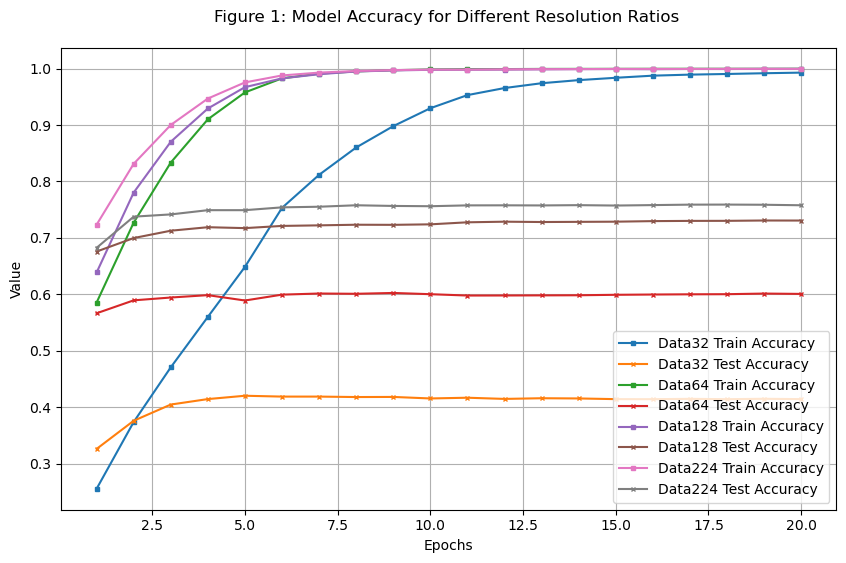

In [111]:
# compare model accuracy 
title = "Figure 1: Model Accuracy for Different Resolution Ratios \n"
Accuracy_comparison(epochs,data32_train_accuray_ls,data32_test_accuracy_ls, data64_train_accuray_ls,data64_test_accuracy_ls,
                    data128_train_accuray_ls,data128_test_accuracy_ls,data224_train_accuray_ls,data224_test_accuracy_ls,title)

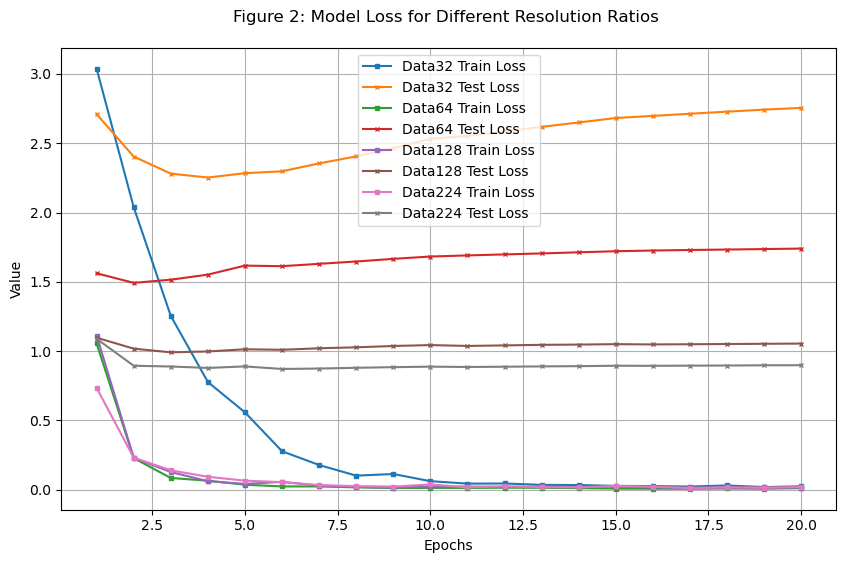

In [112]:
# compare loss for different resolution ratios 
title = "Figure 2: Model Loss for Different Resolution Ratios \n"
Loss_comparison(epochs,data32_train_loss_ls,data32_test_loss_ls,data64_train_loss_ls,data64_test_loss_ls,
                data128_train_loss_ls,data128_test_loss_ls,data224_train_loss_ls,data224_test_loss_ls,title)

## Different models comparison

* select five models: ResNet, GoogleNet, EfficientNet, DenseNet and SqueezeNet 

## ResNet

In [76]:
# ResNet model 
model_resnet = models.resnet50(pretrained = True)
print(model_resnet)

/Users/lhs/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [77]:
for param in model_resnet.parameters(): 
    param.requires_grad = True


model_resnet.fc = nn.Sequential(        
    nn.Linear(in_features=2048, out_features=100, bias=True)
    )


model_resnet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_resnet = optim.SGD(model_resnet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_resnet, step_size= 5, gamma=0.5)

In [78]:
# model train and test 
epochs = 20
resnet_train_accuray_ls = []
resnet_train_loss_ls = []
resnet_test_accuracy_ls = []
resnet_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train_dataloader, model_resnet, loss_fn, optimizer_resnet)
    resnet_train_loss_ls.append(train_loss)
    resnet_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test_dataloader, model_resnet, loss_fn)
    resnet_test_loss_ls.append(test_loss)
    resnet_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 61.3%, Train Loss: 0.861079,Test Accuracy: 73.5%, Test Loss: 0.906329 

Epoch 2
-------------------------------
Train Accuracy: 82.6%, Train Loss: 0.105555,Test Accuracy: 79.6%, Test Loss: 0.670448 

Epoch 3
-------------------------------
Train Accuracy: 91.7%, Train Loss: 0.036815,Test Accuracy: 80.3%, Test Loss: 0.658527 

Epoch 4
-------------------------------
Train Accuracy: 96.8%, Train Loss: 0.016937,Test Accuracy: 80.8%, Test Loss: 0.661349 

Epoch 5
-------------------------------
Train Accuracy: 99.0%, Train Loss: 0.011520,Test Accuracy: 81.3%, Test Loss: 0.681660 

Epoch 6
-------------------------------
Train Accuracy: 99.8%, Train Loss: 0.007320,Test Accuracy: 81.3%, Test Loss: 0.704899 

Epoch 7
-------------------------------
Train Accuracy: 99.9%, Train Loss: 0.005827,Test Accuracy: 81.3%, Test Loss: 0.730347 

Epoch 8
-------------------------------
Train Accuracy: 100.0%, Train Loss: 0.004486,Test Accuracy: 81.3

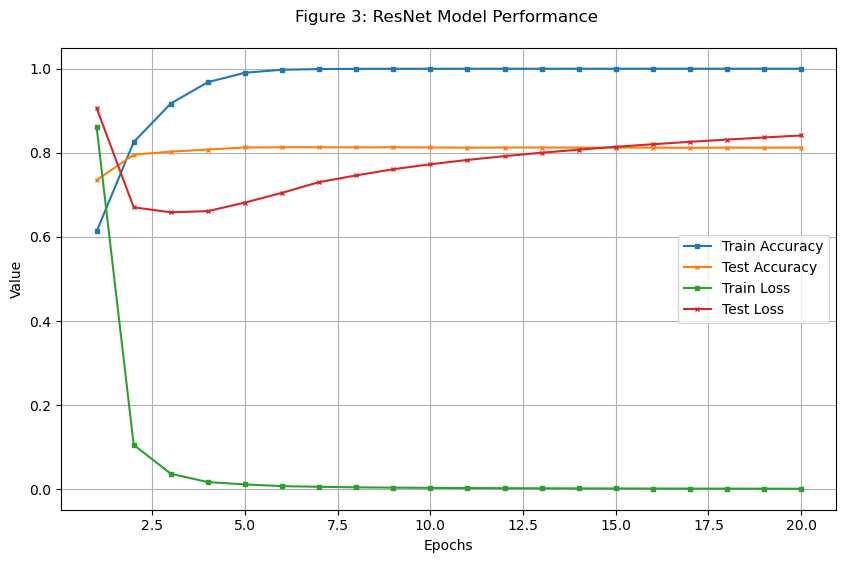

In [79]:
# plot learning curve 
title = "Figure 3: ResNet Model Performance \n"
Model_comparison(epochs,resnet_train_accuray_ls,resnet_train_loss_ls,resnet_test_accuracy_ls,resnet_test_loss_ls,title)

In [80]:
# save model
torch.save(model_resnet,'model_resnet.pth')

## GoogleNet 

In [46]:
# googlnet model 
model_googlenet = models.googlenet(pretrained = True)
print(model_googlenet)

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

/Users/lhs/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [47]:
for param in model_googlenet.parameters(): 
    param.requires_grad = True


model_googlenet.fc = nn.Sequential(        
    nn.Linear(in_features=1024, out_features=100, bias=True)
    
    )

model_googlenet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_googlenet = torch.optim.SGD(model_googlenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_googlenet, step_size= 5, gamma=0.5)

In [48]:
# model train and test 
epochs = 20
googlenet_train_accuray_ls = []
googlenet_train_loss_ls = []
googlenet_test_accuracy_ls = []
googlenet_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train_dataloader, model_googlenet, loss_fn, optimizer_googlenet)
    googlenet_train_loss_ls.append(train_loss)
    googlenet_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test_dataloader, model_googlenet, loss_fn)
    googlenet_test_loss_ls.append(test_loss)
    googlenet_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 38.2%, Train Loss: 1.956497,Test Accuracy: 57.0%, Test Loss: 1.817466 

Epoch 2
-------------------------------
Train Accuracy: 65.2%, Train Loss: 1.063517,Test Accuracy: 66.1%, Test Loss: 1.213657 

Epoch 3
-------------------------------
Train Accuracy: 74.1%, Train Loss: 0.556222,Test Accuracy: 71.5%, Test Loss: 0.976920 

Epoch 4
-------------------------------
Train Accuracy: 80.1%, Train Loss: 0.284080,Test Accuracy: 74.3%, Test Loss: 0.875221 

Epoch 5
-------------------------------
Train Accuracy: 85.1%, Train Loss: 0.200554,Test Accuracy: 75.4%, Test Loss: 0.830251 

Epoch 6
-------------------------------
Train Accuracy: 89.0%, Train Loss: 0.119611,Test Accuracy: 75.8%, Test Loss: 0.822303 

Epoch 7
-------------------------------
Train Accuracy: 92.3%, Train Loss: 0.083874,Test Accuracy: 75.8%, Test Loss: 0.835525 

Epoch 8
-------------------------------
Train Accuracy: 94.6%, Train Loss: 0.044322,Test Accuracy: 75.9%

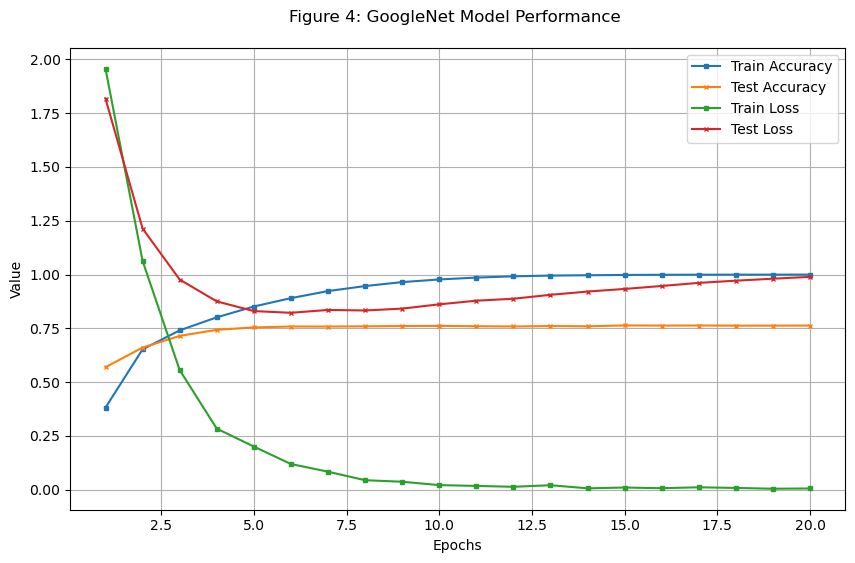

In [81]:
# plot learning curve 
title = "Figure 4: GoogleNet Model Performance \n"
Model_comparison(epochs,googlenet_train_accuray_ls,googlenet_train_loss_ls,googlenet_test_accuracy_ls,googlenet_test_loss_ls,title)

In [54]:
# save model
torch.save(model_googlenet,'model_googlenet.pth')

## EfficientNet

In [51]:
model_effnet = models.efficientnet_v2_m(pretrained = True) 
print(model_effnet) 

/Users/lhs/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_V2_M_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_V2_M_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  

In [52]:
for param in model_effnet.parameters(): 
    param.requires_grad = True


model_effnet.classifier = nn.Sequential(
    nn.Dropout(p=0.3, inplace=True),        
    nn.Linear(in_features=1280, out_features=100, bias=True)
)


model_effnet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_effnet = torch.optim.SGD(model_effnet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_effnet, step_size= 5, gamma=0.5)

In [53]:
# model train and test 
epochs = 20
effnet_train_accuray_ls = []
effnet_train_loss_ls = []
effnet_test_accuracy_ls = []
effnet_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train_dataloader, model_effnet, loss_fn, optimizer_effnet)
    effnet_train_loss_ls.append(train_loss)
    effnet_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test_dataloader, model_effnet, loss_fn)
    effnet_test_loss_ls.append(test_loss)
    effnet_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 33.2%, Train Loss: 1.205112,Test Accuracy: 72.3%, Test Loss: 0.929013 

Epoch 2
-------------------------------
Train Accuracy: 75.8%, Train Loss: 0.354300,Test Accuracy: 80.6%, Test Loss: 0.642854 

Epoch 3
-------------------------------
Train Accuracy: 85.4%, Train Loss: 0.063372,Test Accuracy: 82.3%, Test Loss: 0.593815 

Epoch 4
-------------------------------
Train Accuracy: 90.3%, Train Loss: 0.052099,Test Accuracy: 83.4%, Test Loss: 0.595108 

Epoch 5
-------------------------------
Train Accuracy: 93.6%, Train Loss: 0.029778,Test Accuracy: 83.8%, Test Loss: 0.609787 

Epoch 6
-------------------------------
Train Accuracy: 95.7%, Train Loss: 0.012501,Test Accuracy: 84.4%, Test Loss: 0.623536 

Epoch 7
-------------------------------
Train Accuracy: 97.1%, Train Loss: 0.020236,Test Accuracy: 84.2%, Test Loss: 0.649170 

Epoch 8
-------------------------------
Train Accuracy: 98.0%, Train Loss: 0.002981,Test Accuracy: 84.7%

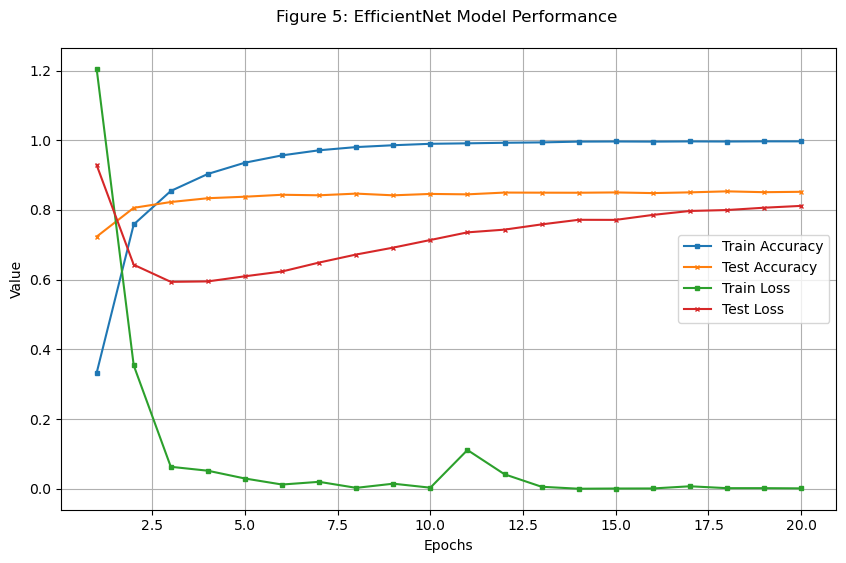

In [82]:
# plot learning curve 
title = "Figure 5: EfficientNet Model Performance \n"
Model_comparison(epochs,effnet_train_accuray_ls,effnet_train_loss_ls,effnet_test_accuracy_ls,effnet_test_loss_ls,title)

In [56]:
# save model 
torch.save(model_effnet,'model_effnet.pth')

## DenseNet 

In [63]:
model_densenet = models.densenet121(pretrained = True) 
print(model_densenet) 

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

/Users/lhs/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/lhs/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [64]:
for param in model_densenet.parameters(): 
    param.requires_grad = True


model_densenet.classifier = nn.Sequential(      
    nn.Linear(in_features=1024, out_features=100, bias=True)
)


model_densenet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_densenet = torch.optim.SGD(model_densenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_densenet, step_size= 5, gamma=0.5)

In [65]:
# model train and test 
epochs = 20
densenet_train_accuray_ls = []
densenet_train_loss_ls = []
densenet_test_accuracy_ls = []
densenet_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train_dataloader, model_densenet, loss_fn, optimizer_densenet)
    densenet_train_loss_ls.append(train_loss)
    densenet_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test_dataloader, model_densenet, loss_fn)
    densenet_test_loss_ls.append(test_loss)
    densenet_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------


/Users/lhs/anaconda3/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:136: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Train Accuracy: 57.0%, Train Loss: 0.912970,Test Accuracy: 74.5%, Test Loss: 0.880937 

Epoch 2
-------------------------------
Train Accuracy: 79.6%, Train Loss: 0.186481,Test Accuracy: 78.4%, Test Loss: 0.712608 

Epoch 3
-------------------------------
Train Accuracy: 88.3%, Train Loss: 0.086004,Test Accuracy: 79.6%, Test Loss: 0.677050 

Epoch 4
-------------------------------
Train Accuracy: 94.3%, Train Loss: 0.041397,Test Accuracy: 80.2%, Test Loss: 0.680520 

Epoch 5
-------------------------------
Train Accuracy: 97.6%, Train Loss: 0.027457,Test Accuracy: 80.2%, Test Loss: 0.704483 

Epoch 6
-------------------------------
Train Accuracy: 99.2%, Train Loss: 0.019481,Test Accuracy: 80.4%, Test Loss: 0.730373 

Epoch 7
-------------------------------
Train Accuracy: 99.7%, Train Loss: 0.012415,Test Accuracy: 80.2%, Test Loss: 0.755956 

Epoch 8
-------------------------------
Train Accuracy: 99.9%, Train Loss: 0.009323,Test Accuracy: 80.3%, Test Loss: 0.778658 

Epoch 9
--------

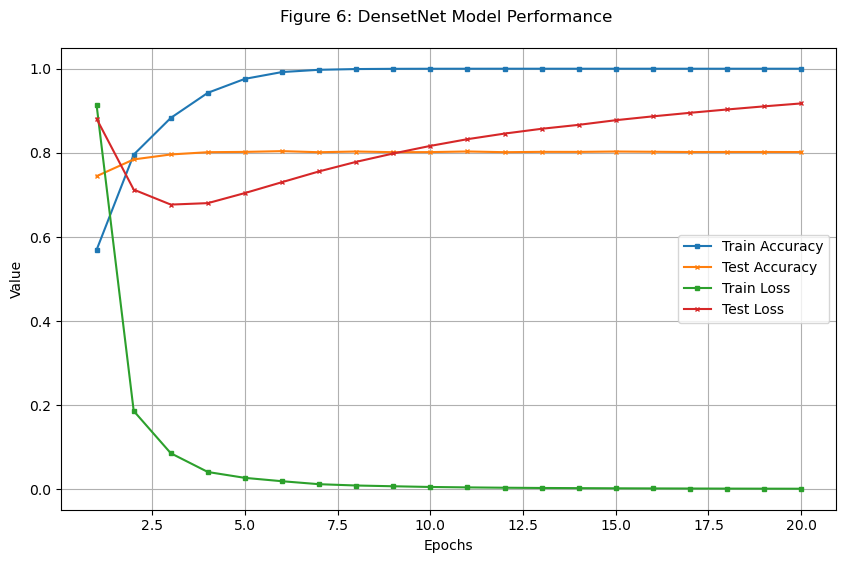

In [83]:
# plot learning curve 
title = "Figure 6: DensetNet Model Performance \n"
Model_comparison(epochs,densenet_train_accuray_ls,densenet_train_loss_ls,densenet_test_accuracy_ls,densenet_test_loss_ls,title)

In [73]:
# save model 
torch.save(model_densenet,'model_densenet.pth')

## Squeezenet

In [96]:
model_squeezenet = models.squeezenet1_0( pretrained = True)
print(model_squeezenet) 

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [97]:
for param in model_squeezenet.parameters(): 
    param.requires_grad = True


model_squeezenet.classifier = nn.Sequential(   
    nn.Dropout(p=0.5, inplace=False),
    nn.Conv2d(512, 100, kernel_size=(1, 1), stride=(1, 1)),
    nn.ReLU(inplace=True),
    nn.AdaptiveAvgPool2d(output_size=(1, 1))   
)


model_squeezenet.to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer_squeezenet = torch.optim.SGD(model_squeezenet.parameters(), lr=0.01)
scheduler = StepLR(optimizer_squeezenet, step_size= 5, gamma=0.5)

In [98]:
# model train and test 
epochs = 20
squeezenet_train_accuray_ls = []
squeezenet_train_loss_ls = []
squeezenet_test_accuracy_ls = []
squeezenet_test_loss_ls = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------") 
    train_correct, train_loss = train_loop(train_dataloader, model_squeezenet, loss_fn, optimizer_squeezenet)
    squeezenet_train_loss_ls.append(train_loss)
    squeezenet_train_accuray_ls.append(train_correct)
    test_correct, test_loss = test_loop(test_dataloader, model_squeezenet, loss_fn)
    squeezenet_test_loss_ls.append(test_loss)
    squeezenet_test_accuracy_ls.append(test_correct)
    scheduler.step()
    print(f"Train Accuracy: {(100*train_correct):>0.1f}%, Train Loss: {train_loss:>8f},Test Accuracy: {(100*test_correct):>0.1f}%, Test Loss: {test_loss:>8f} \n")
print("Done!")

Epoch 1
-------------------------------
Train Accuracy: 28.7%, Train Loss: 2.098853,Test Accuracy: 32.6%, Test Loss: 2.774220 

Epoch 2
-------------------------------
Train Accuracy: 53.8%, Train Loss: 1.083741,Test Accuracy: 50.0%, Test Loss: 1.831083 

Epoch 3
-------------------------------
Train Accuracy: 60.9%, Train Loss: 0.948953,Test Accuracy: 57.7%, Test Loss: 1.513465 

Epoch 4
-------------------------------
Train Accuracy: 65.2%, Train Loss: 0.747048,Test Accuracy: 54.5%, Test Loss: 1.684430 

Epoch 5
-------------------------------
Train Accuracy: 67.8%, Train Loss: 0.584578,Test Accuracy: 59.8%, Test Loss: 1.458396 

Epoch 6
-------------------------------
Train Accuracy: 73.5%, Train Loss: 0.416317,Test Accuracy: 65.9%, Test Loss: 1.187472 

Epoch 7
-------------------------------
Train Accuracy: 74.8%, Train Loss: 0.358757,Test Accuracy: 66.4%, Test Loss: 1.190208 

Epoch 8
-------------------------------
Train Accuracy: 76.0%, Train Loss: 0.275793,Test Accuracy: 67.3%

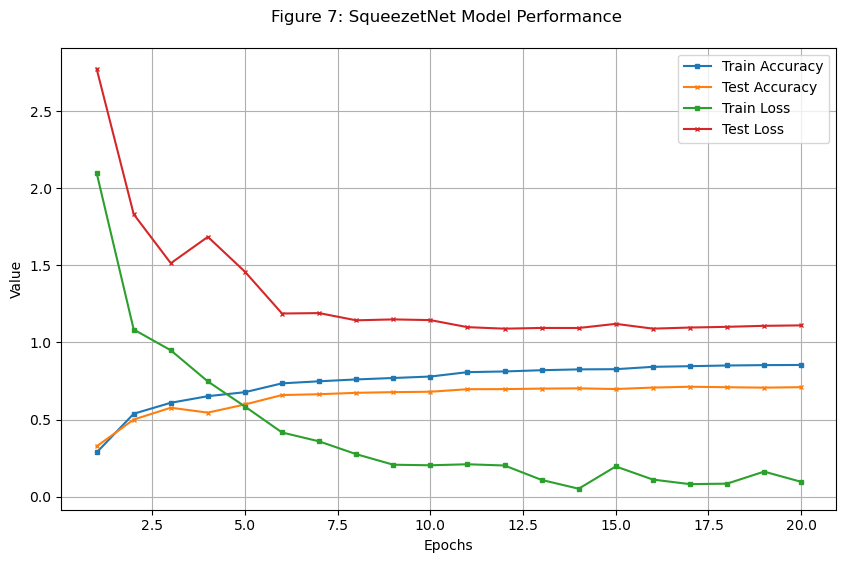

In [99]:
# plot learning curve 
title = "Figure 7: SqueezetNet Model Performance \n"
Model_comparison(epochs,squeezenet_train_accuray_ls,squeezenet_train_loss_ls,squeezenet_test_accuracy_ls,squeezenet_test_loss_ls,title)

In [100]:
# save model 
torch.save(model_squeezenet,'model_squeezenet.pth')